In [2]:
import pandas as pd
pd.options.display.max_columns = 50
pd.set_option("display.precision", 4)
pd.set_option('display.float_format', '{:.4f}'.format)

import numpy as np

import seaborn as sns
sns.set_theme(context='notebook', style='white', palette='dark', font='sans-serif', font_scale=1, color_codes=True, rc=None)
sns.set_style({'axes.facecolor': 'white','axes.edgecolor': 'white'})

import matplotlib.pyplot as plt
plt.rcParams.update({
    'text.color': 'black',  # Change font color
    'axes.labelcolor': 'black',  # Change axis label color
    'xtick.color': 'black',  # Change x-tick color
    'ytick.color': 'black',  # Change y-tick color
    'font.weight': 'bold',  # Change font weight
    'axes.titleweight': 'bold',  # Change title weight
    'axes.labelweight': 'bold',# Change label weight
})


### <span style="color:Khaki;">Reading Feature Engineered Dataset:

In [3]:
df=pd.read_feather('feature_engineerd_data.feather')

In [4]:
df.sample(5)

,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,Mortgage Loan,Home Equity Loan,Credit-Builder Loan,Payday Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Auto Loan,debt_income_ratio,loan_income_ratio_month,credit_utilization_per_account,credit_inquiry_per_loan,age_group,delayed_payment_ratio,investment_to_income_ratio,credit_limit_change_rate,total_credit_exposure,credit_utilization_to_income_ratio,savings_rate,reliable_payment,disposable_income,income_stability,total_liability,debt_paytime
12826,17,Engineer,60078.2700,4758.5225,5,7,11,4,10,6,7,9.0000,Standard,2198.8000,31,187,Yes,128.9062,53.1082,Low_Spent_Large_Value_Payments,543.8379,Poor,0,1,0,1,0,1,1,0,5006.5225,36.6304,5.1667,2.0000,<18,1.2000,0.0112,0.0372,2229.8000,0.0005,0.0112,3.2086,4629.6163,0.9505,2327.7062,16.9261
46940,29,Doctor,78809.8800,6341.4900,8,4,6,3,17,10,7,7.0000,Standard,203.2100,38,245,Yes,172.1503,51.1994,High_Spent_Large_Value_Payments,650.7993,Standard,0,0,0,1,1,0,1,0,9851.2350,36.6242,4.2222,2.0000,26-35,2.5000,0.0081,0.0285,241.2100,0.0005,0.0081,4.0816,6169.3397,0.9656,375.3603,1.1736
82773,50,Developer,26596.9100,2095.8200,6,7,13,3,28,15,10,3.0000,Standard,841.2800,24,242,Yes,303.2298,25.6315,Low_Spent_Small_Value_Payments,269.0344,Good,0,0,1,1,0,0,0,0,2417.9009,6.8889,3.4286,1.0000,36-50,3.7500,0.0122,0.0412,865.2800,0.0009,0.0122,6.1983,1792.5902,0.9456,1144.5098,2.7653
69084,41,Writer,29715.1600,2044.2314,4,6,16,5,18,9,14,8.0000,Standard,1036.0300,23,237,Yes,349.4554,26.7707,High_Spent_Medium_Value_Payments,331.6602,Standard,0,0,0,0,1,1,1,0,2476.2633,5.8331,4.6000,2.0000,36-50,1.5000,0.0131,0.0588,1059.0300,0.0008,0.0131,3.7975,1694.7760,0.8255,1385.4854,2.9562
90488,28,Entrepreneur,7252.0650,530.3388,7,5,24,3,27,25,13,7.0000,Bad,1345.6600,25,208,Yes,16.2827,0.0000,Low_Spent_Small_Value_Payments,260.6370,Poor,0,0,0,0,0,0,1,0,805.7850,30.6860,3.1250,2.0000,26-35,6.2500,0.0000,0.0622,1370.6600,0.0034,0.0000,12.0192,514.0560,0.8776,1361.9427,77.8615


## <span style="color:Khaki;">Defining variable type

In [5]:
continuous = ['age', 'annual_income', 'monthly_inhand_salary','delay_from_due_date','interest_rate', 'outstanding_debt', 'credit_utilization_ratio', 
                   'credit_history_age', 'total_emi_per_month', 'amount_invested_monthly', 'monthly_balance','changed_credit_limit', 
                    'debt_income_ratio', 'loan_income_ratio_month', 'credit_utilization_per_account', 'reliable_payment',
                  'delayed_payment_ratio', 'investment_to_income_ratio','credit_limit_change_rate', 'total_credit_exposure', 'credit_utilization_to_income_ratio', 
                   'savings_rate',  'income_stability', 'total_liability', 'debt_paytime']

## <p Style="color: Aqua"> Plotting box plot to see the Outliers:

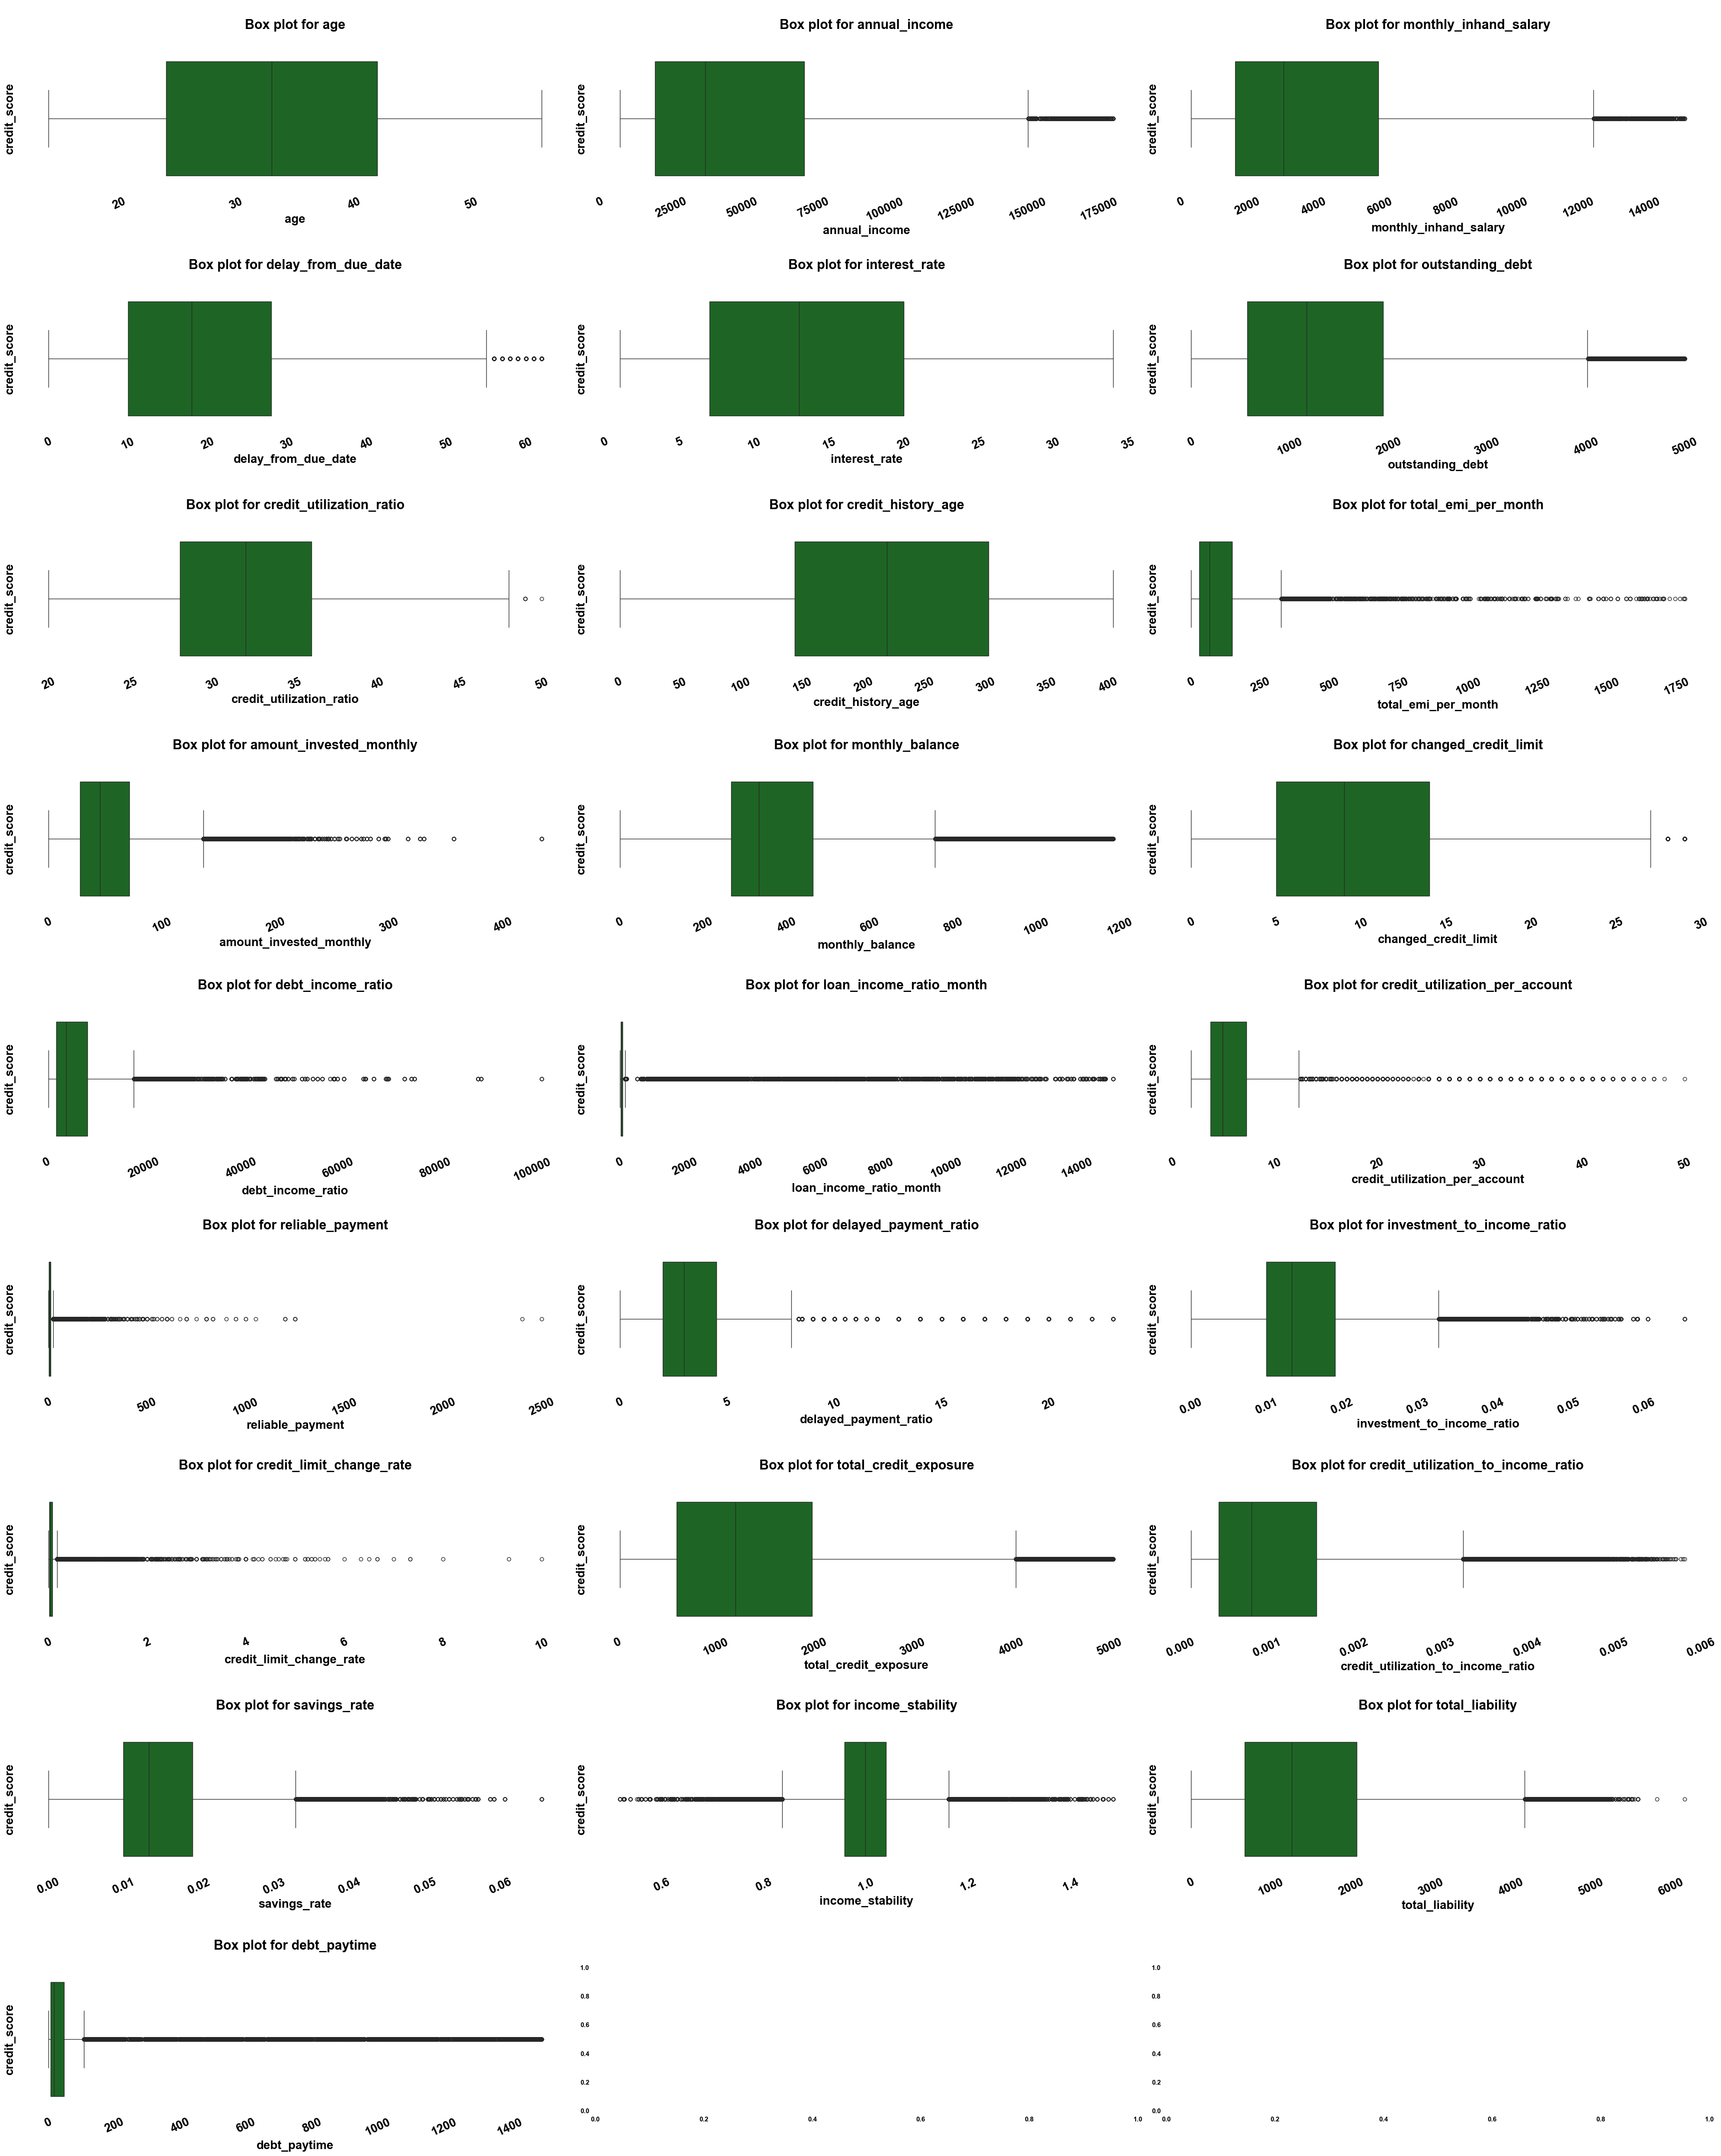

In [11]:
fig, axes = plt.subplots(ncols=3, nrows = int(np.ceil(len(continuous)/3)), figsize=(40, 50))

for i, col in enumerate(continuous):
    if i != 'credit_score':
        sns.boxplot(data=df, x=col,orient='h',color='g',ax=axes[i//3, i%3])
        axes[i//3, i%3].set_title(f"\nBox plot for {col}\n", weight='bold', fontsize=22)  # Explicitly set title font weight and size
        axes[i//3, i%3].tick_params(axis='x', rotation=25, labelsize=20)  # Set xtick label size
        axes[i//3, i%3].tick_params(axis='y', labelsize=20)  # Set ytick label size
        axes[i//3, i%3].set_xlabel(col, fontsize=20, weight='bold')  # Set xlabel size and weight
        axes[i//3, i%3].set_ylabel('credit_score', fontsize=20, weight='bold')  # Set ylabel size and weight
    
plt.tight_layout()
plt.show()